# World Development Indicators Mini-Project #

<p style="font-size:20px;color:blue;">This is a small project that investigates 2 indicators from the data set provided by The World Bank.</p> 

<p style="font-size:20px;color:blue;">The data set can be downloaded here: <a href="https://www.kaggle.com/worldbank/world-development-indicators">World Indicators Data Set</a></p> 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
%matplotlib inline

In [35]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


<h1 style="color:blue;"> Indicators of Interest</h1><br>

<div style="font-size:16px">
<strong>I am interested in the following indicators:</strong>
    <ul style="line-height:1.5">
    <li>Urban population (% of total)</li>
    <li>Arable Land (% of Land Area)</li>
    </ul>
    
<p> **Research Question:** Do countries with larger urban populations have less arable land?</p>

<p>Urbanization continues to occur in our societies and an increasing number of people live in cities, towns and other urban areas. This is occurring at the expense of arable land, which is vital for providing our growing population with food and other resources. By comparing the urban population of a country to its arable land, this project will reveal whether growing urban populations are posing a threat to the land available for agriculture.<br><br>

I have chosen to use percentage values for both indicators in order to facilitate comparisons. These percentages avoid the problem of larger countries have larger values for both variables, which may skew the results and provide an inaccurate representation of reality.</p></div> 

<h2>Creating the Initial Dataframes</h2>

In [36]:
# Arable Land
arable = data["IndicatorName"].str.contains("Arable land \(% of")
arableList = data[arable]
arableList.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
23196,Arab World,ARB,Arable land (% of land area),AG.LND.ARBL.ZS,1961,3.382112
23289,Caribbean small states,CSS,Arable land (% of land area),AG.LND.ARBL.ZS,1961,1.731719
23380,Central Europe and the Baltics,CEB,Arable land (% of land area),AG.LND.ARBL.ZS,1961,47.800081
23463,East Asia & Pacific (all income levels),EAS,Arable land (% of land area),AG.LND.ARBL.ZS,1961,8.210879
23607,East Asia & Pacific (developing only),EAP,Arable land (% of land area),AG.LND.ARBL.ZS,1961,9.961371


In [37]:
# Urban Population
urban = data["IndicatorName"].str.contains("Urban population \(% of ")
urbanList = data[urban]
urbanList.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
79,Arab World,ARB,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,31.285384
156,Caribbean small states,CSS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,31.597490
227,Central Europe and the Baltics,CEB,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,44.507921
349,East Asia & Pacific (all income levels),EAS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,22.471132
472,East Asia & Pacific (developing only),EAP,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,16.917679


<p style="font-size:16px"> Due to the large number of data points, I am forced to examine only the values for one year. To provide a more representative comparison of what the world is like today, 2013 was used as the comparison year because it was the latest year for which data from both indicators was available.</p>

<h2>Isolating a Year of Data</h2>

<p style="font-size:16px">I need to first isolate a year of data, then group the values by Country Name in order to get an average. After this, the two refined data sets need to be compared to see which set has fewer values. Finally, the set with more values needs to be filtered so that both sets have the same number of values.</p>

In [47]:
arableList2013 = arableList[arableList["Year"] == 2013] # isolate 2013 data

del arableList2013["IndicatorCode"]
del arableList2013["Year"]

arableList2013.head()

arableList2013Unique = arableList2013.groupby("CountryName", as_index=False).mean() # for scatter plot
arableList2013Code = arableList2013.groupby("CountryCode", as_index=False).mean() # for choropleth map
arableList2013Unique.head()
arableList2013Code.head()

,CountryCode,Value
0,ABW,11.111111
1,ADO,6.170213
2,AFG,11.924455
3,AGO,3.930376
4,ALB,22.521898


In [48]:
alist = arableList2013Unique["CountryName"].tolist()
acodelist = arableList2013Code["CountryCode"].tolist()
len(alist), len(acodelist) # both should have the same number

(239, 239)

In [49]:
urbanList2013 = urbanList[urbanList["Year"] == 2013] # isolate 2013 data

del urbanList2013["IndicatorCode"]
del urbanList2013["Year"]

urbanList2013.head()

urbanList2013Unique = urbanList2013.groupby("CountryName", as_index=False).mean() # for scatter plot
urbanList2013Code = urbanList2013.groupby("CountryCode", as_index=False).mean() # for choropleth map
urbanList2013Unique.head()
urbanList2013Code.head()

,CountryCode,Value
0,ABW,42.058
1,ADO,86.165
2,AFG,25.871
3,AGO,42.490
4,ALB,55.383


In [50]:
ulist = urbanList2013Unique["CountryName"].tolist()
ucodelist = urbanList2013Code["CountryCode"].tolist()
len(ulist), len(ucodelist) # urban data set has more values than arable data set, so it needs to be filtered.

(245, 245)

In [51]:
filter1 = np.in1d(urbanList2013Unique["CountryName"], alist) 
filter2 = np.in1d(urbanList2013Code["CountryCode"], acodelist)
# boolean list of items in the urban data set that are also in the list of countries in the arable data set.

urbanList2013Unique = urbanList2013Unique[filter1]
urbanList2013Code = urbanList2013Code[filter2]

# Both sets now have the same number of values.

<h2>Visualizing the Data on a Map</h2>

<p style="font-size:16px">Before I compare the two variables, I want to examine the global distribution on a choropleth map. This will allow me to more clearly see how today's society exists with regards to these two variables.</p>

<p style="font-size:18px;font-weight:bold">Urban Population Data (2013)</p>

In [60]:
country_geo = "geo/world-countries.json"

In [73]:
map = folium.Map(location=[0,0], zoom_start=1.5)

In [74]:
map.choropleth(geo_data=country_geo, data=urbanList2013Code,
             columns=['CountryCode', 'Value'],
             threshold_scale=[0, 20, 40, 60, 80, 100],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Urban Population (% of Total)")

In [75]:
map.save('urbanList2013Unique.html')

In [76]:
from IPython.display import HTML
HTML('<iframe src=urbanList2013Unique.html width=700 height=450></iframe>')

<p style="font-size:18px;font-weight:bold">Interpreting the Map</p>

<p style="font-size:16px">There is a large spread of values present across the world. The areas with the highest urban populations are located in North and South America, as well as Europe, Australia and New Zealand. These areas all have at least 60% of their population living in urban areas. A few other areas such as Japan and the Middle East also have similar percentages of people in Urban areas.<br><br>

The areas with a smaller percentage of people in urban areas are found mainly in Africa and South Asia, as well as a few parts of  South America.</p>

<p style="font-size:18px;font-weight:bold">Arable Land Data (2013)</p>

In [81]:
map = folium.Map(location=[0,0], zoom_start=1.5)

In [82]:
map.choropleth(geo_data=country_geo, data=arableList2013Code,
             columns=['CountryCode', 'Value'],
             threshold_scale=[0, 20, 40, 60, 80, 100],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Arable Land (% of Land Area)")

In [83]:
map.save('arableList2013Unique.html')

In [84]:
from IPython.display import HTML
HTML('<iframe src=arableList2013Unique.html width=700 height=450></iframe>')

<p style="font-size:18px;font-weight:bold">Interpreting the Map</p>

<p style="font-size:16px">The majority of countries have only between 0% and 20% of their land area set aside as arable land. Several countries in Europe, India, and a few countries in Africa have more than this. No country has set aside more than 60% of its land area as arable land.</p>

<h2>Comparing Urban Population and Arable Land</h2>

<p style="font-size:16px">Using a scatter plot, urban population and arable land will be compared to see if there is any kind of relationship between the two variables.</p>

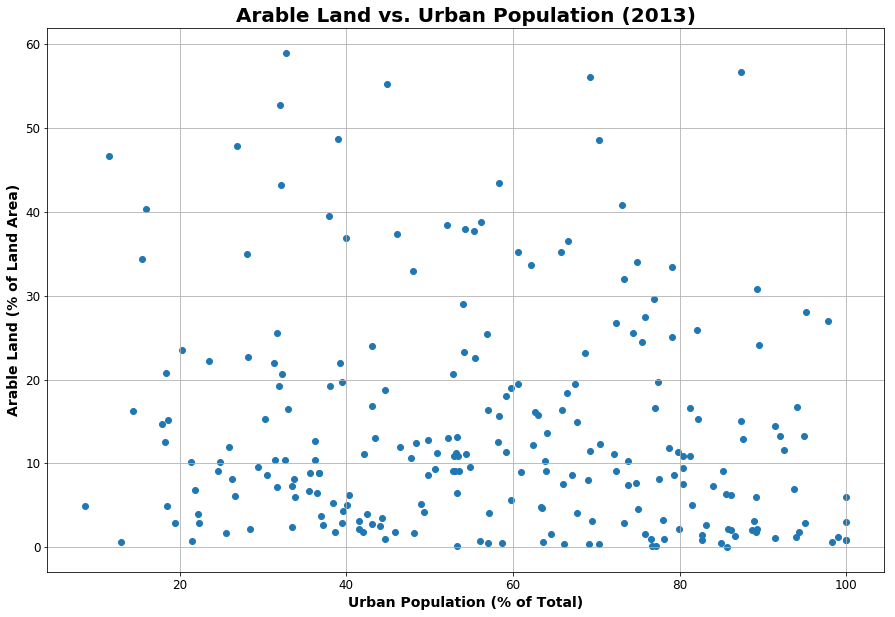

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_title("Arable Land vs. Urban Population (2013)", fontsize=20, fontweight="bold")
ax.set_xlabel("Urban Population (% of Total)", fontsize=14, fontweight="bold")
ax.set_ylabel("Arable Land (% of Land Area)", fontsize=14, fontweight="bold")
ax.tick_params(axis="both", which="major", labelsize=12)

X = urbanList2013Unique["Value"]
Y = arableList2013Unique["Value"]

ax.scatter(X, Y)

<h2>Interpreting the Graph</h2>

<p style="font-size:16px">The majority of countries had between 0% and 30% of their land area as arable land, and no country had more than 60% of its land area as arable land. While no country has 0% of its population living in urban areas, a few countries have 100% of their populations living in urban areas. All the other countries have varying percentages.<p>
    
<p style="font-size:16px">A general inspection of the scatter plot does not reveal a noticeable pattern between the two variables. A correlation test will provide a quantitative measure of correlation.<p>

In [ ]:
np.corrcoef(X, Y)

<p style="font-size:16px">The correlation coefficient produced a value of -0.133 (3 s.f.). The absolute value of this is not high enough to indicate that there may be a correlation between the two variables. <br><br> From this lack of correlation, it can be inferred that there is no relationship between the urban population (as a percentage of the total) and the amount of arable land (as a percentage of the available land area).</p>

<h2>Conclusions</h2>

<p style="font-size:16px">There does not appear to be a distinct relationship between the Urban Population as a percentage of the total population and the amount of arable land as a percentage of the land area. This most likely suggests that an increase in the urban population is not contributing to a lack of arable land. Also, new technologies may allow us to overcome the reduction in land area by increasing yield and using more efficient agricultural techniques.<p>

